# Understand Customer Purchase Behaviour 

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. 

In [ ]:
# for data
import numpy as np # perform math operations (matrix math)
import pandas as pd 
from pandas import Series, DataFrame

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

#for the image
from IPython.display import Image

#statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

Assumptions 
1. Gender: Females tends to buy more than males.
2. Ages: Young people will tend to buy cheaper things and older people might tend to buy expensive things.
3. Occupation: The higher income occupation will spend more on expensive products.
4. number of city years: Newly transfered people tends to buy more compared to the people who stayed longer in the place.
5. City category: if the city has more number of purchases then it will show what kind of city it is.

# Data Exploration
1. Access the Data 
2. Get Information about the variables
3. Showing what type of variable we have
4. Univariate analysis
    - Continuous variable
    - Categorical variable
5. Bi-variate analysis 
    - Use of anova (target ~ Features)
    - continuous vs. categorical 
    - categorical vs categorical 

In [2]:
#access the data
df = pd.read_csv('PurchaseBehaviour.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


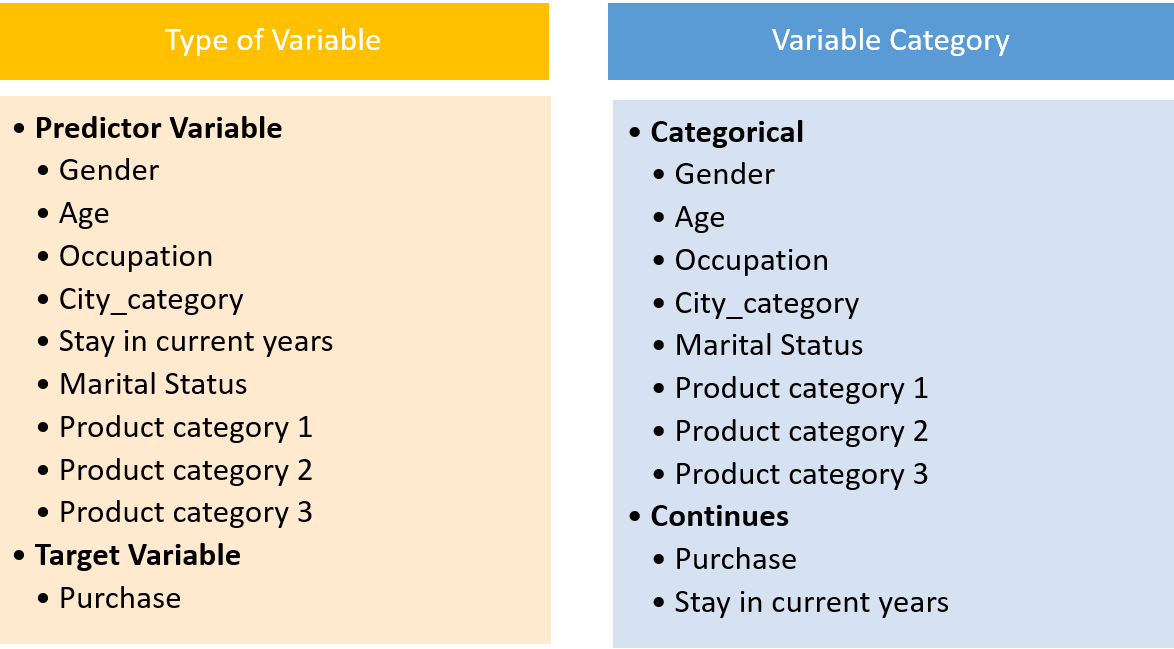

In [6]:
# show what type of variables we have
Image(filename='data.png',width=750, height=750)

# Univariate analysis

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


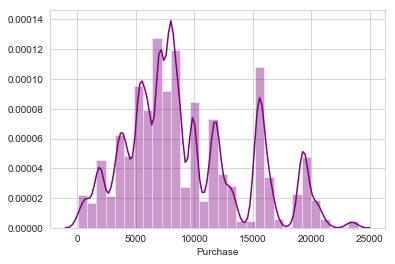

In [7]:
#continues data
sns.distplot(df['Purchase'],bins=30,color='purple')

Observation: The target variable consists of 3 modes from the different ranges of prices. 

M    414259
F    135809
Name: Gender, dtype: int64


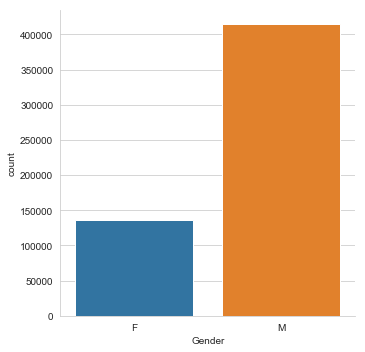

In [28]:
#Categorical variable
sns.catplot('Gender', data = df, kind = 'count')
print (df['Gender'].value_counts())

1. On the Gender there are more male buyers than Females. So it might be interesting to see if there are also difference with the number of purchases.

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64


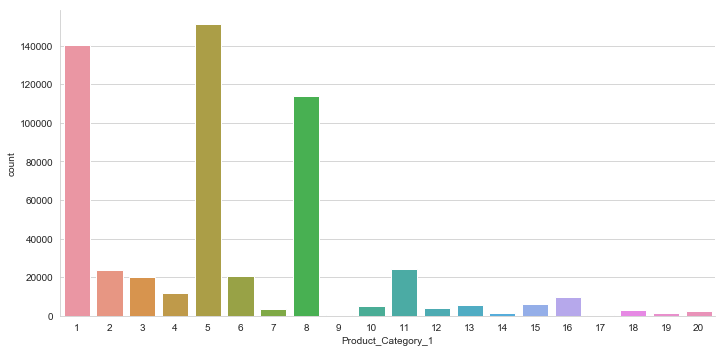

In [9]:
sns.catplot('Product_Category_1', data = df, kind = 'count', aspect = 2)
print (df['Product_Category_1'].value_counts())

Observation: 
 Product category 1 has products that have lesser number of purchase compared to 1-6 and 8 and these are products: 9,17,19,20


8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64


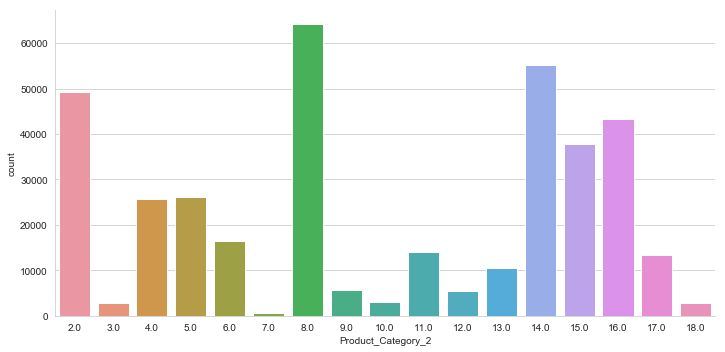

In [10]:
sns.catplot('Product_Category_2', data = df, kind = 'count', aspect = 2)
print (df['Product_Category_2'].value_counts())

3. Product category 2 has 7.0 as the lowest frequency

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64


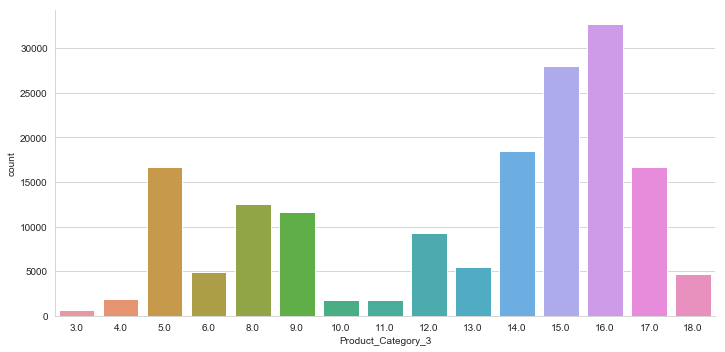

In [11]:
sns.catplot('Product_Category_3', data = df, kind = 'count', aspect = 2)
print (df['Product_Category_3'].value_counts())

Product 3 has the lowest frequency in Product category 3.

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


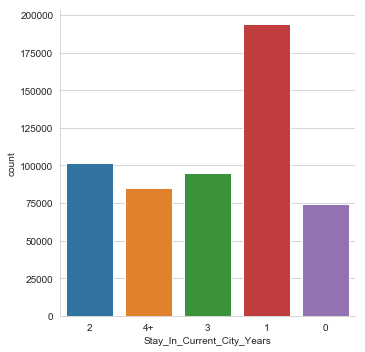

In [30]:
# frequency of the Stay_In_Current_City_Years
sns.catplot(x ='Stay_In_Current_City_Years', data = df, kind = 'count')
print (df['Stay_In_Current_City_Years'].value_counts())

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


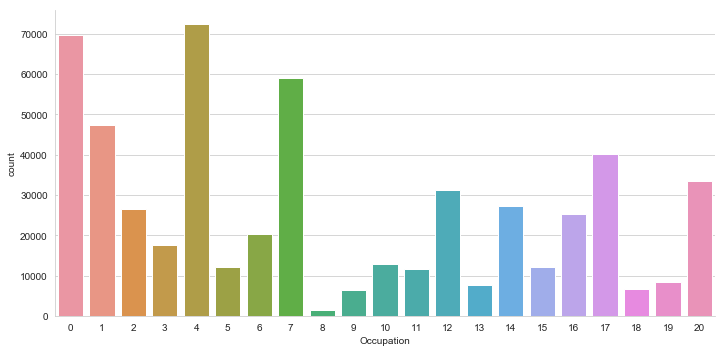

In [31]:
# frequency of the occupation
sns.catplot(x ='Occupation', data = df, kind = 'count',aspect = 2)
print (df['Occupation'].value_counts())

# Bi-variate Analysis

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


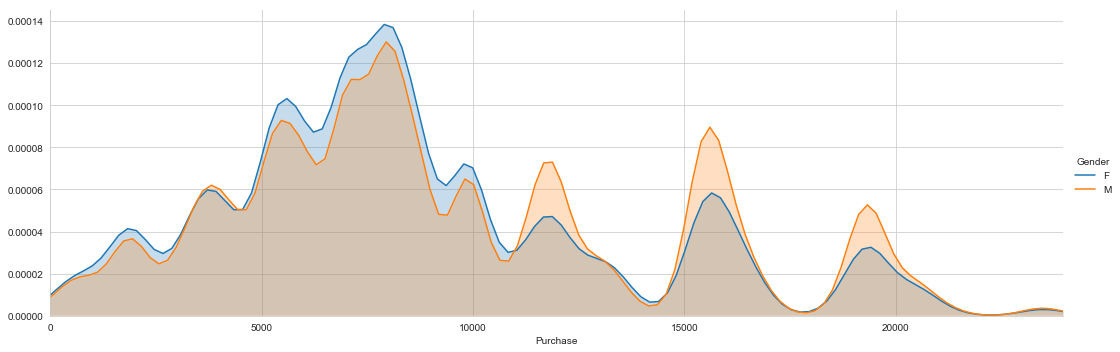

In [25]:
# this is to see if the males and females have the same purchase or not.
fig = sns.FacetGrid(df, hue = 'Gender', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

Observation: Females tends to buy more on cheaper products ranging 0 to 11000, and males tends to buy more expensive products from 10,000 to 20000+.

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


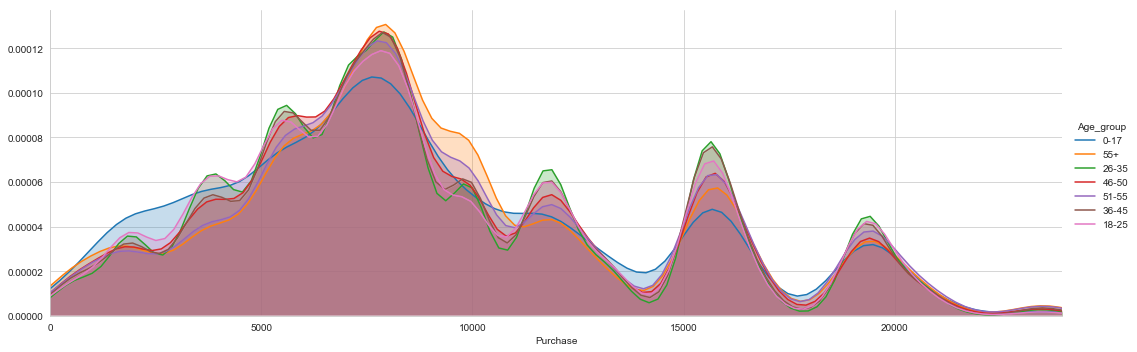

In [22]:
#Comparison between the purchase by the age group.
age_group = {'0-17': '0-17', '18-25': '18-25', '26-35':'26-35', '36-45': '36-45', '46-50': '46-50',
             '36-45': '36-45', '51-55': '51-55', '55+':'55+'}
df['Age_group'] = df['Age'].map(age_group)
fig = sns.FacetGrid(df, hue = 'Age_group', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

Observation: young age group (0-17, shown in blue) buys more on the cheaper prices and the rest of the age groups have a little bit of difference only on the other price range.  

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


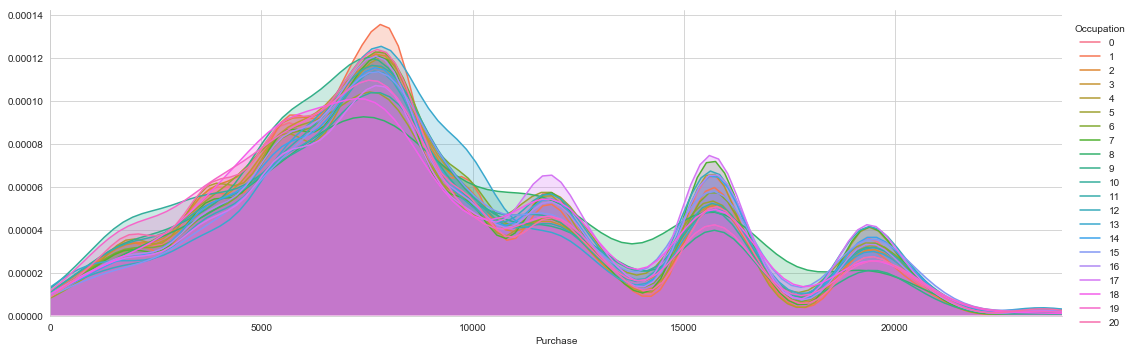

In [23]:
# Comparison between the Purchase by the occupation
fig = sns.FacetGrid(df, hue = 'Occupation', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

Earlier we conclude that the higer income occupation buy more but in the data we really cannot see what's happening and it doesnt show clear representation. So we will check the mean. 

In [50]:
# getting the mean of all the Purchases from the different occupation category
purchase_per_occupation = df['Purchase'].groupby(df['Occupation'])
purchase_per_occupation.mean()

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

The only a little bit of difference between the means on different occupations and this also tells us nothing because some people might stil spend more even if their income are lesser and some people might spend less even if their income is higher. 

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


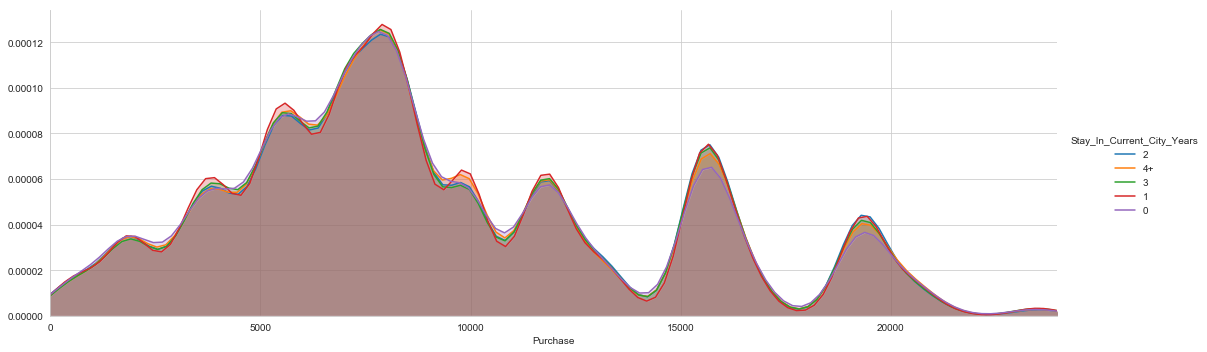

In [51]:
#Comparison between the 'purhase' and 'the stay in current years'
fig = sns.FacetGrid(df, hue = 'Stay_In_Current_City_Years', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

In [32]:
#numerical representation of the above graph showing their mean
purchase_per_stay = df['Purchase'].groupby(df['Stay_In_Current_City_Years'])
purchase_per_stay.mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

The stay in current years doesnt have any impact on the purchase. 

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


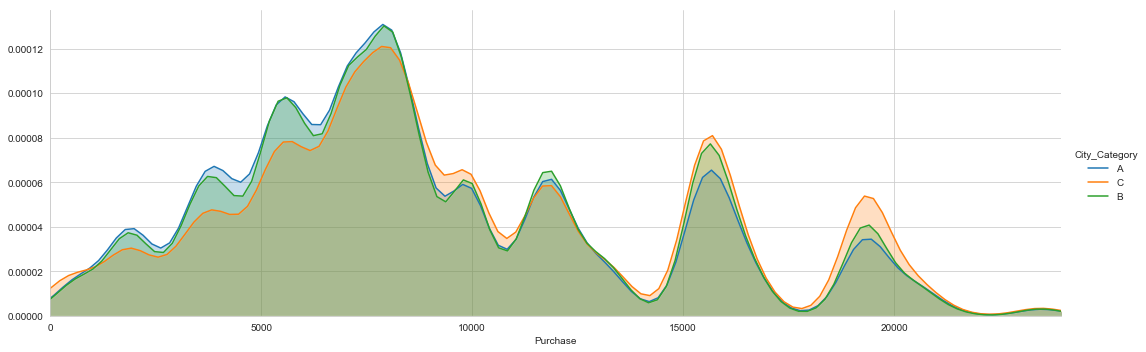

In [26]:
#comparison between city category and purchase
fig = sns.FacetGrid(df, hue = 'City_Category', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

City category C might be a city which has more luxury products available compared to the other cities A and B. Cities A and B might have cheaper products available 

In [53]:
#check the mean of Purchase with Product_Cateogory_1, 2, 3
purchase_per_cat1 = df['Purchase'].groupby(df['Product_Category_1'])
purchase_per_cat1.mean()

# 'Product_Category_1' 19 & 20 has low frequencies based on Purchase

Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

In [54]:
purchase_per_cat2 = df['Purchase'].groupby(df['Product_Category_2'])
purchase_per_cat2.mean()

Product_Category_2
2.0     13619.356401
3.0     11235.359570
4.0     10215.192001
5.0      9027.821574
6.0     11503.551379
7.0      6884.683706
8.0     10273.259518
9.0      7277.006851
10.0    15648.729543
11.0     8940.580515
12.0     6975.472504
13.0     9683.352388
14.0     7105.264916
15.0    10357.077691
16.0    10295.681933
17.0     9421.576577
18.0     9352.440433
Name: Purchase, dtype: float64

In [55]:
purchase_per_cat3 = df['Purchase'].groupby(df['Product_Category_3'])
purchase_per_cat3.mean()

Product_Category_3
3.0     13939.696574
4.0      9794.386667
5.0     12117.786889
6.0     13194.311043
8.0     13024.918882
9.0     10431.697210
10.0    13505.813441
11.0    12091.437673
12.0     8715.512762
13.0    13185.118703
14.0    10052.594530
15.0    12339.369900
16.0    11981.890642
17.0    11769.943001
18.0    10993.980773
Name: Purchase, dtype: float64

Product_Category_1,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,Max_value,Sum
Gender,,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,...,1462,623,1046,2402,62,382,451,723,41961,177770
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,...,4087,900,5244,7426,516,2743,1152,1827,115547,529806


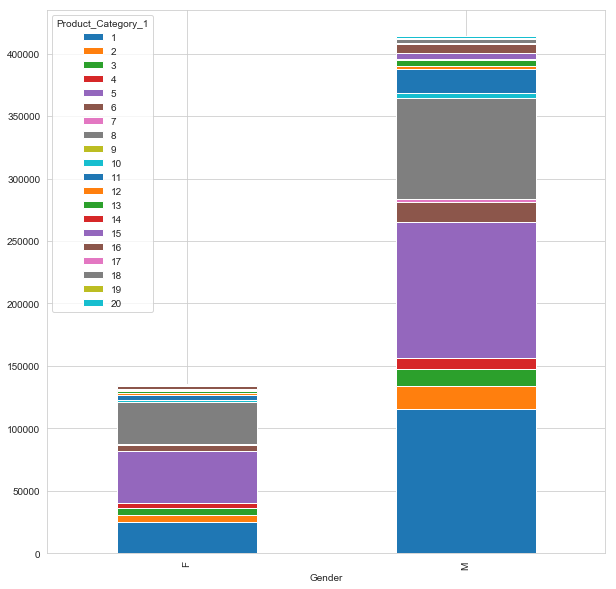

In [57]:
# Gender to product category 1
df2 = df.groupby(['Gender','Product_Category_1'])['Gender'].count().unstack('Product_Category_1').fillna(99)
df2.plot(kind='bar', figsize=(10,10), stacked = True )
df2['Max_value'] = df2.apply(max,axis = 1)
df2['Sum'] = df2.apply(sum, axis = 1)
df2.head()

Here, we want to see what kind of Products in Product category 1 Males and Females buy. It is visible that product 5 is the most bought Product in Females (shown in Violet) and Product 1 (shown in Blue is) the most bought products in Males 

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max_value
Gender,,,,,,,,,,,,,,,,,,
F,9199,617,7619,6155,3291,137,16529,1497,736,2754,1744,2669,19693,6432,9496,2484,478,19693
M,40018,2267,18058,20080,13175,489,47559,4196,2307,11380,3784,7862,35415,31423,33759,10836,2292,47559


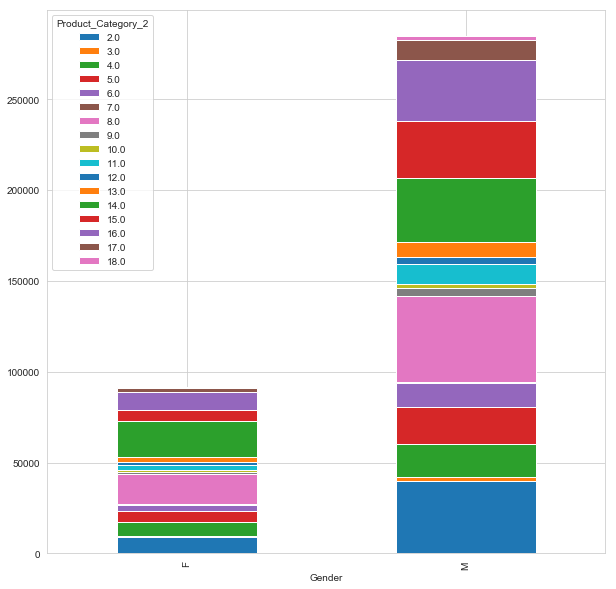

In [58]:
# Gender to Produc_category 2
df2 = df.groupby(['Gender','Product_Category_2'])['Gender'].count().unstack('Product_Category_2').fillna(99)
df2.plot(kind='bar', figsize=(10,10), stacked = True )
df2['Max_value'] = df2.apply(max, axis = 1)
df2

Here, we want to see what kind of Products in Product category 2 Males and Females buy. For females product 14 shown in green is the most bought products and for males 8 shown in pink has the higher sales. 

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max_value
Gender,,,,,,,,,,,,,,,,
F,95,433,4297,828,2941,2676,414,334,2722,1229,5623,4610,6774,3738,880,6774
M,518,1442,12361,4062,9621,8903,1312,1471,6524,4230,12805,23403,25862,12964,3749,25862


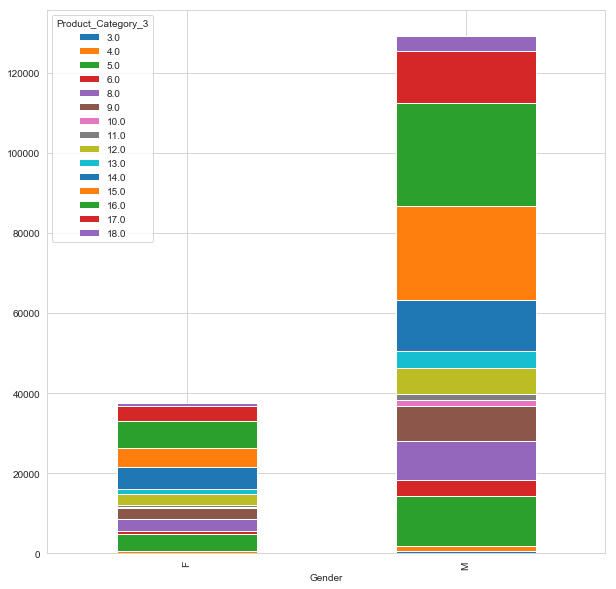

In [59]:
#Gender to Product_Category_3
df2 = df.groupby(['Gender','Product_Category_3'])['Gender'].count().unstack('Product_Category_3').fillna(99)
df2.plot(kind='bar', figsize=(10,10), stacked = True )
df2['Max_value'] = df2.apply(max, axis = 1)
df2

Here, we want to see what kind of Products in Product category 3 Males and Females buy. For females the product which consists the highest sales is 16 shown in green and for males they buy product 16 as well.

Product_Category_1,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,Max_value,total
Age,,,,,,,,,,,,,,,,,,,,,
0-17,3585,805,1200,758,4330,399,53,2258,16,111,...,112,39,160,229,6,27,59,90,4330,19432
18-25,26962,4428,4710,2463,28522,3749,481,17911,63,603,...,756,230,1024,1598,41,339,275,469,28522,128182
26-35,58249,8928,7662,4192,61473,8485,1651,44256,154,1787,...,2096,564,2372,4118,127,1042,563,898,61473,281060
36-45,27648,4912,3854,2354,29377,3899,809,23296,107,1235,...,1250,312,1395,1955,135,702,320,506,29377,139390
46-50,10474,2105,1376,990,11971,1622,327,10656,33,520,...,551,149,602,879,95,351,149,227,11971,57672


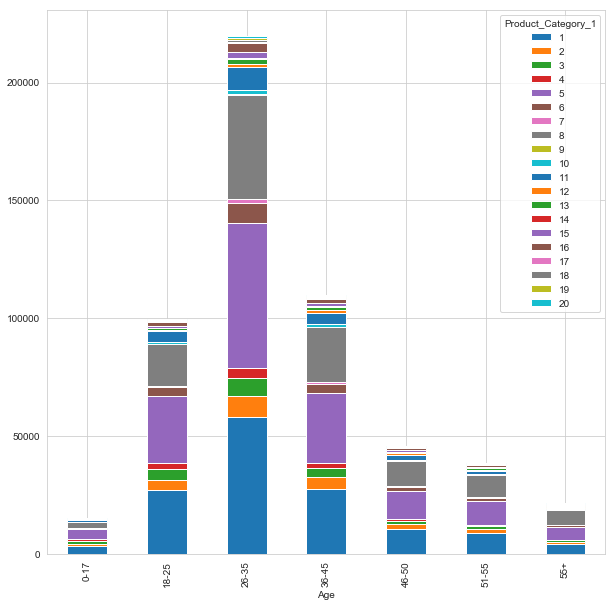

In [60]:
# Age to product category 1
df2 = df.groupby(['Age','Product_Category_1'])['Age'].count().unstack('Product_Category_1').fillna(99)
df2.plot(kind='bar', figsize=(10,10), stacked = True )
df2['Max_value'] = df2.apply(max, axis = 1)
df2['total'] = df2.apply(sum, axis = 1)
df2.head()

Age group (0-17): Buys product 5 more <br>
Age group (18-25):Buys product 1 more <br>
Age group (26-35): Buys product 5 more<br>
Age group (36-45): Buys product 5 more<br>
Age group (45-50): Buys product 5 more<br>
Age group (46-50): Buys product 5 more<br>
Age group (51-55): Buys product 5 more<br>
Age group (55+): Buys product 18 more


# 2. Data Pre-processing

2.1 Run regression to check the R-square of categorical variables to dependent variables before data pre-processing <br>
2.2 'Gender': make it to binary <br>
2.3 Handle missing value: check if there are NaN value and decide how to handle <br>
2.4 Transforming Categorical into Dummy Variables <br>
2.5 Drop out less important variables <br>
2.6 Features and Labels <br>



Dependent Variables: Purchase <br>
Numerical Variables: User_ID, Product_ID <br>
Categorical Variables: Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, <br>Product_Category_2, Product_Category_3<br>

In [97]:
df = pd.read_csv('PurchaseBehaviour.csv')

In [98]:
# Checking data types
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [99]:
# Checking number of unique values in each variables 
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# 2.1. Run regression for each categorical variables with dependent variable 'Purchase' 
check the R-square before data cleaning & pre-processing

In [101]:

# Check R-square for all categorical variables                
df_lr = ols('Purchase ~  Age + City_Category + Occupation + Stay_In_Current_City_Years  + Product_Category_1 + Product_Category_2 + Product_Category_3', data=df).fit()
df_lr.summary()

# R-square = 0.170

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     2124.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:01:38   Log-Likelihood:            -1.6448e+06
No. Observations:              166821   AIC:                         3.290e+06
Df Residuals:                  166804   BIC:                         3.290e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.167e+04     83.522    139.680      0.000    1.15e+04    1.18e+04
Age[T.18-25]                       439.4520     71.595      6.138      0.000     299.128     579.776
Age[T.26-35]                       556.0938     69.051      8.053      0.000     420.756     691.432
Age[T.36-45]                       679.6149     71.197      9.546      0.000     540.071     819.159
Age[T.46-50]                       674.4294     77.656      8.685      0.000     522.226     826.633
Age[T.51-55]                      1042.1492     79.759     13.066      0.000     885.823    1198.476
Age[T.55+]                         906.6963     89.969     10.078      0.000     730.359    1083.033
City_Category[T.B]                 207.4579     28.908      7.176      0.000     150.798     264.117
City_Category[T.C]                 834.9478     30.432     27.437      0.000     775.303     894.593
Stay_In_Current_City_Years[T.1]    105.9252     36.511      2.901      0.004      34.364     177.487
Stay_In_Current_City_Years[T.2]    209.5086     40.531      5.169      0.000     130.068     288.949
Stay_In_Current_City_Years[T.3]     58.4644     41.237      1.418      0.156     -22.359     139.288
Stay_In_Current_City_Years[T.4+]   148.7970     42.547      3.497      0.000      65.406     232.188
Occupation                          10.0021      1.764      5.671      0.000       6.545      13.459
Product_Category_1                -832.0158      5.101   -163.106      0.000    -842.014    -822.018
Product_Category_2                  25.3746      3.379      7.510      0.000      18.753      31.996
Product_Category_3                  74.5045      3.284     22.685      0.000      68.067      80.942
==============================================================================
Omnibus:                     2104.057   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2253.959
Skew:                           0.255   Prob(JB):                         0.00
Kurtosis:                       3.255   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# Run regressions for 'User_ID'
df_lr = ols('Purchase ~ User_ID', data=df).fit()
df_lr.summary()

# R square = 0.000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     12.23
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           0.000470
Time:                        17:01:38   Log-Likelihood:            -5.4681e+06
No. Observations:              550068   AIC:                         1.094e+07
Df Residuals:                  550066   BIC:                         1.094e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4488.5996   3932.146     -1.142      0.254   -1.22e+04    3218.281
User_ID        0.0137      0.004      3.497      0.000       0.006       0.021
==============================================================================
Omnibus:                    32201.153   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35633.492
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       2.662   Cond. No.                     5.82e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
# Run regression for each categorical variable: 'Gender'
df_lr = ols('Purchase ~ Gender', data=df).fit()
df_lr.summary()

# R square = 0.004

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2010.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:01:48   Log-Likelihood:            -5.4671e+06
No. Observations:              550068   AIC:                         1.093e+07
Df Residuals:                  550066   BIC:                         1.093e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8734.5658     13.605    641.990      0.000    8707.900    8761.232
Gender[T.M]   702.9603     15.678     44.838      0.000     672.232     733.688
==============================================================================
Omnibus:                    31510.399   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34845.184
Skew:                           0.594   Prob(JB):                         0.00
Kurtosis:                       2.668   Cond. No.                         3.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Run regressions for each categorical variable: 'Occupation'
df_lr = ols('Purchase ~ Occupation', data=df).fit()
df_lr.summary()

# R square = 0.000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           7.26e-54
Time:                        17:01:49   Log-Likelihood:            -5.4680e+06
No. Observations:              550068   AIC:                         1.094e+07
Df Residuals:                  550066   BIC:                         1.094e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9134.3934     10.777    847.563      0.000    9113.270    9155.516
Occupation    16.0431      1.038     15.454      0.000      14.008      18.078
==============================================================================
Omnibus:                    32128.991   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35561.740
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       2.663   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Run regressions for each categorical variable: 'City_Category'
df_lr = ols('Purchase ~ City_Category', data=df).fit()
df_lr.summary()

# R square = 0.004

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:01:52   Log-Likelihood:            -5.4670e+06
No. Observations:              550068   AIC:                         1.093e+07
Df Residuals:                  550065   BIC:                         1.093e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           8911.9392     13.042    683.303      0.000    8886.376    8937.502
City_Category[T.B]   239.3613     16.697     14.335      0.000     206.635     272.088
City_Category[T.C]   807.9818     17.802     45.388      0.000     773.091     842.873
==============================================================================
Omnibus:                    31506.070   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34877.578
Skew:                           0.594   Prob(JB):                         0.00
Kurtosis:                       2.670   Cond. No.                         4.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# Run regressions for each categorical variable: 'Stay_In_Current_City_Years' 
df_lr = ols('Purchase ~ Stay_In_Current_City_Years', data=df).fit()
df_lr.summary()

# R square = 0.000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.383
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.40e-07
Time:                        17:01:56   Log-Likelihood:            -5.4681e+06
No. Observations:              550068   AIC:                         1.094e+07
Df Residuals:                  550063   BIC:                         1.094e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         9180.0751     18.415    498.507      0.000    9143.982    9216.168
Stay_In_Current_City_Years[T.1]     70.0708     21.663      3.235      0.001      27.612     112.530
Stay_In_Current_City_Years[T.2]    140.3547     24.225      5.794      0.000      92.874     187.835
Stay_In_Current_City_Years[T.3]    106.8290     24.574      4.347      0.000      58.664     154.994
Stay_In_Current_City_Years[T.4+]    95.5237     25.237      3.785      0.000      46.060     144.987
==============================================================================
Omnibus:                    32195.492   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35632.517
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       2.662   Cond. No.                         7.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# Run regressions for each categorical variable: 'Marital_Status'
df_lr = ols('Purchase ~ Marital_Status', data=df).fit()
df_lr.summary()

# R square = 0.000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1181
Date:                Wed, 05 Dec 2018   Prob (F-statistic):              0.731
Time:                        17:01:56   Log-Likelihood:            -5.4681e+06
No. Observations:              550068   AIC:                         1.094e+07
Df Residuals:                  550066   BIC:                         1.094e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9265.9076      8.815   1051.189      0.000    9248.631    9283.184
Marital_Status    -4.7330     13.772     -0.344      0.731     -31.726      22.260
==============================================================================
Omnibus:                    32207.273   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35643.386
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       2.662   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Run regressions for each categorical variable: 'Product_Category_1' 
df_lr = ols('Purchase ~ Product_Category_1', data=df).fit()
df_lr.summary()

# R-square = 0.118

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                 7.368e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:01:56   Log-Likelihood:            -5.4335e+06
No. Observations:              550068   AIC:                         1.087e+07
Df Residuals:                  550066   BIC:                         1.087e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.163e+04     10.803   1076.968      0.000    1.16e+04    1.17e+04
Product_Category_1  -438.6056      1.616   -271.450      0.000    -441.773    -435.439
==============================================================================
Omnibus:                    61851.449   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86796.582
Skew:                           0.887   Prob(JB):                         0.00
Kurtosis:                       3.800   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# Run regressions for each categorical variable: 'Product_Category_2' 
df_lr = ols('Purchase ~ Product_Category_2', data=df).fit()
df_lr.summary()

# R-square = 0.044

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                 1.735e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:01:57   Log-Likelihood:            -3.7456e+06
No. Observations:              376430   AIC:                         7.491e+06
Df Residuals:                  376428   BIC:                         7.491e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.218e+04     18.003    676.336      0.000    1.21e+04    1.22e+04
Product_Category_2  -214.0471      1.625   -131.728      0.000    -217.232    -210.862
==============================================================================
Omnibus:                    15201.236   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13909.161
Skew:                           0.416   Prob(JB):                         0.00
Kurtosis:                       2.558   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# Run regressions for each categorical variable: 'Product_Category_3' 
df_lr = ols('Purchase ~ Product_Category_3', data=df).fit()
df_lr.summary()

# R square = 0.000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     80.82
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           2.50e-19
Time:                        17:01:57   Log-Likelihood:            -1.6602e+06
No. Observations:              166821   AIC:                         3.320e+06
Df Residuals:                  166819   BIC:                         3.320e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             1.2e+04     40.177    298.719      0.000    1.19e+04    1.21e+04
Product_Category_3   -27.1104      3.016     -8.990      0.000     -33.021     -21.200
==============================================================================
Omnibus:                    19320.962   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5348.529
Skew:                          -0.079   Prob(JB):                         0.00
Kurtosis:                       2.137   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2.2. Make Gender to Binary 

In [111]:
# Turn gender binary
gender_dict = {'M':0, 'F':1}
df["Gender_F"] = df["Gender"].apply(lambda line: gender_dict[line])
df["Gender_F"].value_counts()
del df["Gender"]

# 2.3. Handle Missing Value

In [112]:
# Looking for missing values
# number of null values per variables 
print(df.isnull().sum())

# The only predictors having missing value are Product_Category_2 and Product_Category_3

User_ID                            0
Product_ID                         0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Gender_F                           0
dtype: int64


In [113]:
#Check the percentage of null values per variable
print(df.isnull().sum()/df.shape[0]*100)

# Since removing the NaN value of Product_Category_2 & 3 takes up 31.6% and 69.7% of the total dataset, 
# We consider to keep the NaN values

User_ID                        0.000000
Product_ID                     0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
Gender_F                       0.000000
dtype: float64


In [114]:
# We will input 99 for the NaN value 
df['Product_Category_2'] = df['Product_Category_2'].fillna(99)
df['Product_Category_3'] = df['Product_Category_3'].fillna(99)
df['Product_Category_2'].unique()

array([99.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

# 2.4. Transforming Categorical in Dummy Variables
Run regression to check if R-square improve when creating dummies for Categorical variables
Gender and Marital_Status are binary, will not be included in the following transformation 


In [115]:
# for Occupation 
df_lr = ols('Purchase ~ C(Occupation)', data=df).fit()
df_lr.summary()

# R-square = 0.0004, it has been improved from 0.0000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     98.47
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:02:20   Log-Likelihood:            -5.4671e+06
No. Observations:              550068   AIC:                         1.093e+07
Df Residuals:                  550047   BIC:                         1.093e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9124.4286     19.001    480.207      0.000    9087.187    9161.670
C(Occupation)[T.1]   -171.2353     29.853     -5.736      0.000    -229.745    -112.725
C(Occupation)[T.2]   -171.9469     36.148     -4.757      0.000    -242.795    -101.099
C(Occupation)[T.3]     54.1645     42.255      1.282      0.200     -28.655     136.984
C(Occupation)[T.4]     89.5517     26.622      3.364      0.001      37.373     141.731
C(Occupation)[T.5]    208.7207     49.252      4.238      0.000     112.188     305.253
C(Occupation)[T.6]    132.1071     39.953      3.307      0.001      53.801     210.413
C(Occupation)[T.7]    301.2996     28.040     10.746      0.000     246.343     356.256
C(Occupation)[T.8]    408.1639    128.933      3.166      0.002     155.459     660.868
C(Occupation)[T.9]   -486.6848     66.012     -7.373      0.000    -616.066    -357.304
C(Occupation)[T.10]  -165.0732     48.016     -3.438      0.001    -259.183     -70.964
C(Occupation)[T.11]    89.4173     50.310      1.777      0.076      -9.188     188.023
C(Occupation)[T.12]   672.2117     34.168     19.674      0.000     605.244     739.179
C(Occupation)[T.13]   181.9225     60.120      3.026      0.002      64.089     299.756
C(Occupation)[T.14]   376.2742     35.801     10.510      0.000     306.106     446.442
C(Occupation)[T.15]   654.4626     49.273     13.282      0.000     557.890     751.035
C(Occupation)[T.16]   270.0358     36.770      7.344      0.000     197.968     342.103
C(Occupation)[T.17]   697.0496     31.447     22.166      0.000     635.414     758.685
C(Occupation)[T.18]    45.2273     64.481      0.701      0.483     -81.153     171.608
C(Occupation)[T.19]  -413.8014     57.728     -7.168      0.000    -526.947    -300.656
C(Occupation)[T.20]  -287.9337     33.319     -8.642      0.000    -353.238    -222.629
==============================================================================
Omnibus:                    31738.641   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35248.439
Skew:                           0.598   Prob(JB):                         0.00
Kurtosis:                       2.673   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# for City_Category
df_lr = ols('Purchase ~ C(City_Category)', data=df).fit()
df_lr.summary()

# R-square = 0.0004, it keep as 0.0004

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:02:28   Log-Likelihood:            -5.4670e+06
No. Observations:              550068   AIC:                         1.093e+07
Df Residuals:                  550065   BIC:                         1.093e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8911.9392     13.042    683.303      0.000    8886.376    8937.502
C(City_Category)[T.B]   239.3613     16.697     14.335      0.000     206.635     272.088
C(City_Category)[T.C]   807.9818     17.802     45.388      0.000     773.091     842.873
==============================================================================
Omnibus:                    31506.070   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34877.578
Skew:                           0.594   Prob(JB):                         0.00
Kurtosis:                       2.670   Cond. No.                         4.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# for Stay_In_Current_City_Years
df_lr = ols('Purchase ~ C(Stay_In_Current_City_Years)', data=df).fit()
df_lr.summary()

# R-square = 0.000, it keep as 0.000 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.383
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.40e-07
Time:                        17:02:36   Log-Likelihood:            -5.4681e+06
No. Observations:              550068   AIC:                         1.094e+07
Df Residuals:                  550063   BIC:                         1.094e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            9180.0751     18.415    498.507      0.000    9143.982    9216.168
C(Stay_In_Current_City_Years)[T.1]     70.0708     21.663      3.235      0.001      27.612     112.530
C(Stay_In_Current_City_Years)[T.2]    140.3547     24.225      5.794      0.000      92.874     187.835
C(Stay_In_Current_City_Years)[T.3]    106.8290     24.574      4.347      0.000      58.664     154.994
C(Stay_In_Current_City_Years)[T.4+]    95.5237     25.237      3.785      0.000      46.060     144.987
==============================================================================
Omnibus:                    32195.492   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35632.517
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       2.662   Cond. No.                         7.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# for Product_Category_1                
df_lr = ols('Purchase ~ C(Product_Category_1)', data=df).fit()
df_lr.summary()

# R-square = 0.637, it improved from 0.118
# Product_Category_1 4, 12, 13, 18, 19 ,20 has low impact to Purchase

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 5.070e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:02:45   Log-Likelihood:            -5.1897e+06
No. Observations:              550068   AIC:                         1.038e+07
Df Residuals:                  550048   BIC:                         1.038e+07
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.361e+04      8.083   1683.413      0.000    1.36e+04    1.36e+04
C(Product_Category_1)[T.2]  -2354.2832     21.204   -111.030      0.000   -2395.842   -2312.724
C(Product_Category_1)[T.3]  -3509.5129     22.782   -154.048      0.000   -3554.165   -3464.861
C(Product_Category_1)[T.4]  -1.128e+04     29.079   -387.789      0.000   -1.13e+04   -1.12e+04
C(Product_Category_1)[T.5]  -7366.1304     11.229   -656.004      0.000   -7388.139   -7344.122
C(Product_Category_1)[T.6]   2232.2600     22.659     98.517      0.000    2187.850    2276.670
C(Product_Category_1)[T.7]   2759.4710     50.298     54.863      0.000    2660.889    2858.053
C(Product_Category_1)[T.8]  -6107.2605     12.076   -505.747      0.000   -6130.929   -6083.592
C(Product_Category_1)[T.9]   1931.1570    149.774     12.894      0.000    1637.604    2224.710
C(Product_Category_1)[T.10]  6069.3523     43.066    140.931      0.000    5984.944    6153.761
C(Product_Category_1)[T.11] -8920.9501     21.046   -423.887      0.000   -8962.199   -8879.702
C(Product_Category_1)[T.12] -1.226e+04     48.875   -250.751      0.000   -1.24e+04   -1.22e+04
C(Product_Category_1)[T.13] -1.288e+04     41.448   -310.840      0.000    -1.3e+04   -1.28e+04
C(Product_Category_1)[T.14]  -464.5929     78.017     -5.955      0.000    -617.504    -311.682
C(Product_Category_1)[T.15]  1174.2332     39.029     30.086      0.000    1097.737    1250.729
C(Product_Category_1)[T.16]  1159.8184     31.598     36.706      0.000    1097.888    1221.749
C(Product_Category_1)[T.17] -3435.4591    126.219    -27.218      0.000   -3682.844   -3188.074
C(Product_Category_1)[T.18] -1.063e+04     54.771   -194.141      0.000   -1.07e+04   -1.05e+04
C(Product_Category_1)[T.19] -1.357e+04     76.067   -178.385      0.000   -1.37e+04   -1.34e+04
C(Product_Category_1)[T.20] -1.324e+04     60.511   -218.732      0.000   -1.34e+04   -1.31e+04
==============================================================================
Omnibus:                    45038.777   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70046.387
Skew:                          -0.638   Prob(JB):                         0.00
Kurtosis:                       4.195   Cond. No.                         39.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# for Product_Category_2                
df_lr = ols('Purchase ~ C(Product_Category_2)', data=df).fit()
df_lr.summary()

# R-square = 0.157, it improved from 0.044

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     6020.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:02:55   Log-Likelihood:            -5.4212e+06
No. Observations:              550068   AIC:                         1.084e+07
Df Residuals:                  550050   BIC:                         1.084e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1.362e+04     20.791    655.073      0.000    1.36e+04    1.37e+04
C(Product_Category_2)[T.3.0]  -2383.9968     88.367    -26.978      0.000   -2557.194   -2210.799
C(Product_Category_2)[T.4.0]  -3404.1644     35.507    -95.872      0.000   -3473.758   -3334.571
C(Product_Category_2)[T.5.0]  -4591.5348     35.258   -130.225      0.000   -4660.640   -4522.430
C(Product_Category_2)[T.6.0]  -2115.8050     41.524    -50.954      0.000   -2197.191   -2034.419
C(Product_Category_2)[T.7.0]  -6734.6727    185.516    -36.302      0.000   -7098.279   -6371.067
C(Product_Category_2)[T.8.0]  -3346.0969     27.644   -121.042      0.000   -3400.279   -3291.915
C(Product_Category_2)[T.9.0]  -6342.3496     64.569    -98.226      0.000   -6468.902   -6215.797
C(Product_Category_2)[T.10.0]  2029.3731     86.159     23.554      0.000    1860.504    2198.242
C(Product_Category_2)[T.11.0] -4678.7759     44.016   -106.297      0.000   -4765.046   -4592.506
C(Product_Category_2)[T.12.0] -6643.8839     65.427   -101.547      0.000   -6772.118   -6515.650
C(Product_Category_2)[T.13.0] -3936.0040     49.522    -79.481      0.000   -4033.065   -3838.943
C(Product_Category_2)[T.14.0] -6514.0915     28.606   -227.719      0.000   -6570.158   -6458.025
C(Product_Category_2)[T.15.0] -3262.2787     31.532   -103.461      0.000   -3324.079   -3200.478
C(Product_Category_2)[T.16.0] -3323.6745     30.399   -109.336      0.000   -3383.255   -3264.094
C(Product_Category_2)[T.17.0] -4197.7798     45.049    -93.183      0.000   -4286.074   -4109.486
C(Product_Category_2)[T.18.0] -4266.9160     90.069    -47.374      0.000   -4443.448   -4090.384
C(Product_Category_2)[T.99.0] -6100.6610     23.554   -259.013      0.000   -6146.825   -6054.497
==============================================================================
Omnibus:                    22443.336   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25279.338
Skew:                           0.518   Prob(JB):                         0.00
Kurtosis:                       3.170   Cond. No.                         32.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# for Product_Category_3                
df_lr = ols('Purchase ~ C(Product_Category_3)', data=df).fit()
df_lr.summary()

# R-square = 0.116, it improved from 0.000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     4789.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:03:04   Log-Likelihood:            -5.4343e+06
No. Observations:              550068   AIC:                         1.087e+07
Df Residuals:                  550052   BIC:                         1.087e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1.394e+04    190.805     73.057      0.000    1.36e+04    1.43e+04
C(Product_Category_3)[T.4.0]  -4145.3099    219.793    -18.860      0.000   -4576.097   -3714.523
C(Product_Category_3)[T.5.0]  -1821.9097    194.284     -9.378      0.000   -2202.699   -1441.120
C(Product_Category_3)[T.6.0]   -745.3855    202.411     -3.683      0.000   -1142.105    -348.666
C(Product_Category_3)[T.8.0]   -914.7777    195.405     -4.681      0.000   -1297.764    -531.791
C(Product_Category_3)[T.9.0]  -3507.9994    195.790    -17.917      0.000   -3891.742   -3124.257
C(Product_Category_3)[T.10.0]  -433.8831    222.118     -1.953      0.051    -869.227       1.461
C(Product_Category_3)[T.11.0] -1848.2589    220.840     -8.369      0.000   -2281.099   -1415.419
C(Product_Category_3)[T.12.0] -5224.1838    197.028    -26.515      0.000   -5610.353   -4838.015
C(Product_Category_3)[T.13.0]  -754.5779    201.232     -3.750      0.000   -1148.987    -360.169
C(Product_Category_3)[T.14.0] -3887.1020    193.952    -20.042      0.000   -4267.242   -3506.962
C(Product_Category_3)[T.15.0] -1600.3267    192.881     -8.297      0.000   -1978.367   -1222.286
C(Product_Category_3)[T.16.0] -1957.8059    192.588    -10.166      0.000   -2335.273   -1580.339
C(Product_Category_3)[T.17.0] -2169.7536    194.274    -11.168      0.000   -2550.525   -1788.982
C(Product_Category_3)[T.18.0] -2945.7158    203.046    -14.508      0.000   -3343.679   -2547.753
C(Product_Category_3)[T.99.0] -5717.8596    190.957    -29.943      0.000   -6092.129   -5343.590
==============================================================================
Omnibus:                    29419.224   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34345.653
Skew:                           0.601   Prob(JB):                         0.00
Kurtosis:                       3.230   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
df.head(2)

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F
0,1000001,P00069042,0-17,10,A,2,0,3,99.0,99.0,8370,1
1,1000001,P00248942,0-17,10,A,2,0,1,6.0,14.0,15200,1


In [122]:
# for all categorical variables                
df_lr = ols('Purchase ~ Age + Gender_F + C(Occupation) + C(City_Category) + C(Stay_In_Current_City_Years) + Marital_Status + C(Product_Category_1) + C(Product_Category_2) + C(Product_Category_3)', data=df).fit()
df_lr.summary()
# R-square = 0.648, it improved from 0.170
# Most categorical variables (except Product_Category_3) and overall has improved in R-square if we create dummies for categorical variables. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 1.191e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:03:35   Log-Likelihood:            -5.1810e+06
No. Observations:              550068   AIC:                         1.036e+07
Df Residuals:                  549982   BIC:                         1.036e+07
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            1.368e+04    127.386    107.381      0.000    1.34e+04    1.39e+04
Age[T.18-25]                         -168.4529     40.396     -4.170      0.000    -247.627     -89.279
Age[T.26-35]                          -89.0809     40.267     -2.212      0.027    -168.002     -10.160
Age[T.36-45]                           27.8512     40.841      0.682      0.495     -52.197     107.899
Age[T.46-50]                           43.2318     42.656      1.013      0.311     -40.373     126.836
Age[T.51-55]                          275.3174     43.151      6.380      0.000     190.744     359.891
Age[T.55+]                            152.5118     45.670      3.339      0.001      63.000     242.023
C(Occupation)[T.1]                    -43.0357     17.918     -2.402      0.016     -78.154      -7.918
C(Occupation)[T.2]                     44.9604     21.566      2.085      0.037       2.692      87.229
C(Occupation)[T.3]                    241.1296     25.249      9.550      0.000     191.641     290.618
C(Occupation)[T.4]                    150.3573     17.181      8.751      0.000     116.683     184.032
C(Occupation)[T.5]                     64.3297     29.383      2.189      0.029       6.740     121.920
C(Occupation)[T.6]                    205.3637     24.016      8.551      0.000     158.293     252.434
C(Occupation)[T.7]                    108.4538     16.864      6.431      0.000      75.402     141.506
C(Occupation)[T.8]                   -284.4752     76.929     -3.698      0.000    -435.254    -133.696
C(Occupation)[T.9]                    105.3559     39.976      2.635      0.008      27.004     183.708
C(Occupation)[T.10]                   -37.2865     43.303     -0.861      0.389    -122.159      47.586
C(Occupation)[T.11]                    98.8837     30.040      3.292      0.001      40.007     157.760
C(Occupation)[T.12]                   282.4448     20.422     13.830      0.000     242.418     322.472
C(Occupation)[T.13]                    71.2731     38.617      1.846      0.065      -4.416     146.962
C(Occupation)[T.14]                   189.4546     21.344      8.876      0.000     147.620     231.289
C(Occupation)[T.15]                   366.1195     29.355     12.472      0.000     308.584     423.655
C(Occupation)[T.16]                   107.1768     22.103      4.849      0.000      63.855     150.498
C(Occupation)[T.17]                   190.2706     18.893     10.071      0.000     153.241     227.300
C(Occupation)[T.18]                   -11.8687     38.516     -0.308      0.758     -87.360      63.622
C(Occupation)[T.19]                  -304.4033     34.552     -8.810      0.000    -372.124    -236.682
C(Occupation)[T.20]                   -98.4562     19.926     -4.94

In [123]:
# Encode catergorical values with dummies: Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category_1','Product_Category_2','Product_Category_3'
# Dummies will be created for unique values

categorical_var = ['Age','Occupation','City_Category','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2','Product_Category_3']
for var in categorical_var:
    df[var] = pd.Categorical(df[var]) # make sure its categorical
    df_ = pd.get_dummies(df[var],prefix=str(var)) # get the dummies in a seperate data frame
    print(df[var].unique())
    last_item = var + '_' + str(np.sort(df[var].unique())[-1]) # find the last category
    print(last_item)
    del df_[last_item]   # delete this category to avoid multicolin.
    df = pd.concat([df, df_], axis=1) # merge the date back
    del df[var] # delete the orignial columns

features = df

[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]
Categories (7, object): [0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]
Age_55+
[10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [10, 16, 15, 7, ..., 5, 14, 13, 6]
Occupation_20
[A, C, B]
Categories (3, object): [A, C, B]
City_Category_C
[2, 4+, 3, 1, 0]
Categories (5, object): [2, 4+, 3, 1, 0]
Stay_In_Current_City_Years_4+
[3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [3, 1, 12, 8, ..., 17, 9, 20, 19]
Product_Category_1_20
[99.0, 6.0, 14.0, 2.0, 8.0, ..., 10.0, 17.0, 13.0, 7.0, 18.0]
Length: 18
Categories (18, float64): [99.0, 6.0, 14.0, 2.0, ..., 17.0, 13.0, 7.0, 18.0]
Product_Category_2_99.0
[99.0, 14.0, 17.0, 5.0, 4.0, ..., 12.0, 3.0, 18.0, 11.0, 10.0]
Length: 16
Categories (16, float64): [99.0, 14.0, 17.0, 5.0, ..., 3.0, 18.0, 11.0, 10.0]
Product_Category_3_99.0


In [124]:
df.head(2)

,User_ID,Product_ID,Marital_Status,Purchase,Gender_F,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,1000001,P00069042,0,8370,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,0,15200,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 2.5. Drop out less important variables

In [125]:
#Product_Category_1 19 & 20 have low means and low impact on purchase

del df['Product_Category_1_19']

In [126]:
# Run Regression with new feature of Product_Category_1,to check if R-square is improved               
df_lr = ols('Purchase ~ Product_Category_1_1 + Product_Category_1_2 + Product_Category_1_3 + Product_Category_1_4 + Product_Category_1_5 + Product_Category_1_6 + Product_Category_1_7 + Product_Category_1_8 + Product_Category_1_9 + Product_Category_1_10 + Product_Category_1_11 + Product_Category_1_12 + Product_Category_1_13 + Product_Category_1_14 + Product_Category_1_15 + Product_Category_1_16 + Product_Category_1_17 + Product_Category_1_18', data=df).fit()
df_lr.summary()

# R-square = 0.637, it keeps as 0.637

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 5.352e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:05:55   Log-Likelihood:            -5.1897e+06
No. Observations:              550068   AIC:                         1.038e+07
Df Residuals:                  550049   BIC:                         1.038e+07
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               241.7782     46.992      5.145      0.000     149.676     333.880
Product_Category_1_1   1.336e+04     47.682    280.285      0.000    1.33e+04    1.35e+04
Product_Category_1_2   1.101e+04     50.917    216.239      0.000    1.09e+04    1.11e+04
Product_Category_1_3   9854.9275     51.594    191.010      0.000    9753.806    9956.049
Product_Category_1_4   2087.8813     54.667     38.193      0.000    1980.736    2195.027
Product_Category_1_5   5998.3099     47.634    125.926      0.000    5904.949    6091.670
Product_Category_1_6    1.56e+04     51.539    302.618      0.000    1.55e+04    1.57e+04
Product_Category_1_7   1.612e+04     68.358    235.875      0.000     1.6e+04    1.63e+04
Product_Category_1_8   7257.1798     47.840    151.696      0.000    7163.414    7350.945
Product_Category_1_9    1.53e+04    156.766     97.569      0.000     1.5e+04    1.56e+04
Product_Category_1_10  1.943e+04     63.227    307.367      0.000    1.93e+04    1.96e+04
Product_Category_1_11  4443.4902     50.851     87.383      0.000    4343.824    4543.156
Product_Category_1_12  1109.0817     67.318     16.475      0.000     977.141    1241.022
Product_Category_1_13   480.6224     62.136      7.735      0.000     358.838     602.407
Product_Category_1_14   1.29e+04     90.717    142.198      0.000    1.27e+04    1.31e+04
Product_Category_1_15  1.454e+04     60.549    240.114      0.000    1.44e+04    1.47e+04
Product_Category_1_16  1.452e+04     56.048    259.142      0.000    1.44e+04    1.46e+04
Product_Category_1_17  9928.9813    134.441     73.854      0.000    9665.481    1.02e+04
Product_Category_1_18  2731.0861     71.713     38.083      0.000    2590.530    2871.642
==============================================================================
Omnibus:                    45034.186   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70033.854
Skew:                          -0.638   Prob(JB):                         0.00
Kurtosis:                       4.195   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2.6. Features and Labels

In [16]:
# Group to create count features on 'User_ID' & 'Product_ID'
features['cnt_User_ID'] = df.groupby('User_ID')['User_ID'].transform('count')
features['cnt_Product_ID'] = df.groupby('Product_ID')['Product_ID'].transform('count')

NameError: name 'features' is not defined

In [ ]:
del features['User_ID']
del features['Product_ID']

In [ ]:
df.head(5)

Now we want to seperate the target variable for modelling

In [4]:
# Labels are the values we want to predict
labels = np.array(df['Purchase'])

# Remove the labels from the features
# axis 1 refers to the columns
df = df.drop('Purchase', axis = 1)

## Training and Testing Sets

The final step of the data preparation is the split into training and testing data. During the training, we let the model use the purchases of the test data, so it can learn how to predict the purchases and learn the relationsship between the futures and the target. In the end we will use the test data to evaluate our final model. If the scores would be significaltlly lower the model ist probably overfitted.

In [5]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.20,
                                                                           random_state = 42)

In [6]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (440054, 87)
Training Labels Shape: (440054,)
Testing Features Shape: (110014, 87)
Testing Labels Shape: (110014,)


To compare oure models we use the RMSE and explained variance

RMSE is the squareroot of the average squared error, meaning how fare the real values deviate from the predictions. The lower the RMSE the better.
<br>
explained variance is the percentage of variation in the response variable Y that is explainable by the predictor variable X. A high explained variance (max 1) indicates being able to predict response variable with less error.
The explained variance is similar to the R2, the only difference is, that it substracts the mean error from the residuals. R2 expects the mean error to be zero.
<br>
$\text{explained variance score} = 1 - \mathrm{Var}[\hat{y} - y]\, /\, \mathrm{Var}[y]$


As we need those metrics for each model, we build a function which prints out the model parameter and the metrics.
Furthermore we cross validate our models and take the metrics as average of the validation sample.

In [85]:
from sklearn.metrics import  mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_validate

def print_metrics(model):
    print(model)
    scoring = ['neg_mean_squared_error', 'explained_variance_score']
    scores = cross_validate(model, train_features, train_labels,scoring=scoring, cv=5,return_train_score=False)
    
    print("RMSE : %.4g" % np.sqrt(-1*np.average(scores['test_neg_mean_squared_error'])))
    print('explained variance:', round(np.average(scores['test_explained_variance_score']) , 2))
    print('time:',round((sum(scores['fit_time'])+sum(scores['score_time']))/60,2),' minutes')

## Modelling

In [ ]:
from IPython.display import Image
Image("model_selector.JPG")

We try different models to find the best predictor of our target an beginn with simple regression and regression tree

#### Regression

As we did for the feature engeneering we use regression first. This is our baseline for the further modelling, a measure that we hope to beat with advanced machine learning techniques.

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=54)
lr.fit(X, Y)

print_metrics(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=54, normalize=False)
RMSE : 2862
explained variance: 0.68
time: 0.12  minutes


Our baseline is a RMSE of 2862

#### Decicion Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dt.fit(X, Y)

print_metrics(dt)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RMSE : 2749
explained variance: 0.7
time: 0.39  minutes


The decicion tree has sligtly better results then the regression, both models are pretty fast.
We tried out different parameter settings and ended up with the best results for max depth of 15 (how deep the tree is allowed to grow and min sample leaf of 100 (how much samples has to be in one leaf to allow for a split).
<br>
With this knowledge we continue unsing two advanced machinelearning methods based on trees, Random Forest and AdaBoosting

#### Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_leaf_nodes=80,random_state=42,n_jobs=54)

print_metrics(rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=80,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=54,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
RMSE : 2792
explained variance: 0.69


the random forest estimator is (with this hyper parameter setting, n_estimator is the number of trees in the forest and max leaf is the maximum number of leafs) is between the simple tree and regression and also very fast (due to multiprocessing)

#### AdaBoost Regression

In [64]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor(dt, learning_rate=0.001, loss='linear', n_estimators=50)

print_metrics(ab)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.001, loss='linear', n_estimators=50,
         random_state=None)
RMSE : 2727
explained variance: 0.71
time: 30.52  minutes


The AdaBoost regressor has the best fit in terms of RMS and explained variance, since it not parallelizable it takes much longer to calculate.
<br>
Therefore we try to optimize the random forest regressor by trying different combinations of hyperparameters

## Hyperparameter Tuning

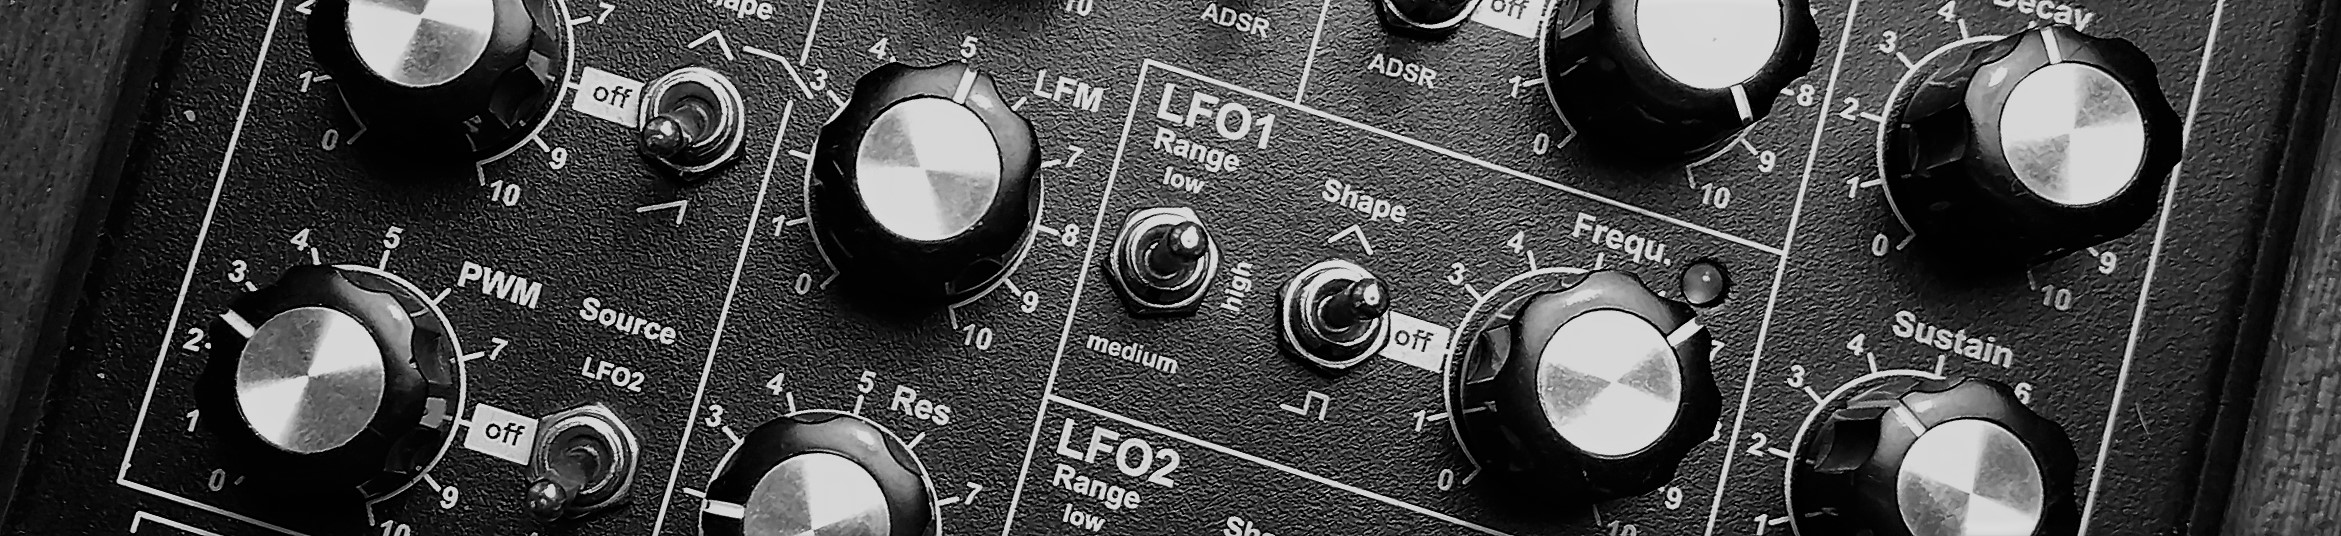

In [65]:
from IPython.display import Image
Image("parameter2.jpg")

RandomizedSearchCV is close to the GridSearch algorithm. In opposite to GridSearch not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.
<br> Therefore the optimum might be worse then for gridsearch, but it takes much less time.

In [77]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [50, 100]
# Maximum number of levels in tree
max_depth = [5, 15, 25]
# Minimum number of samples required to split a node
min_samples_split = [50,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [25, 50, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [50, 100], 'max_depth': [5, 15, 25], 'min_samples_split': [50, 100], 'min_samples_leaf': [25, 50, 100], 'bootstrap': [True, False]}


In [78]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = 54)
rf_random.fit( train_features, train_labels)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=5, bootstrap=True 
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=5, bootstrap=True 
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=5, bootstrap=True 
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=25, max_depth=25, bootstrap=False 
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=25, max_depth=25, bootstrap=False 
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=25, max_depth=25, bootstrap=False 
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=15, bootstrap=True 
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=15, bootstrap=True 
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=15, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=5, b

[Parallel(n_jobs=54)]: Done   2 out of   9 | elapsed:  1.0min remaining:  3.6min


[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=5, bootstrap=True, total=  59.4s
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=15, bootstrap=True, total= 2.1min
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=15, bootstrap=True, total= 2.3min
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=15, bootstrap=True, total= 2.3min
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=25, max_depth=25, bootstrap=False, total= 3.8min


[Parallel(n_jobs=54)]: Done   7 out of   9 | elapsed:  3.9min remaining:  1.1min


[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=25, max_depth=25, bootstrap=False, total= 4.0min
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=25, max_depth=25, bootstrap=False, total= 4.1min


[Parallel(n_jobs=54)]: Done   9 out of   9 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=3, n_jobs=54,
          param_distributions={'n_estimators': [50, 100], 'max_depth': [5, 15, 25], 'min_samples_split': [50, 100], 'min_samples_leaf': [25, 50, 100], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [79]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 50}

In [92]:
rf_final = RandomForestRegressor(n_estimators= 50\
                                 ,max_depth=15\
                                 ,min_samples_leaf=50\
                                 ,min_samples_split=100\
                                 ,n_jobs=-1)
rf_final.fit( train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [93]:
prediction = rf_final.predict(train_features)

print("RMSE : %.4g" % np.sqrt(mean_squared_error(train_labels, prediction)))
print('explained variance:', round(explained_variance_score(train_labels, prediction), 2))

RMSE : 2668
explained variance: 0.72


try out the settings on the unseen test data

In [94]:
prediction = rf_final.predict(test_features)

print("RMSE : %.4g" % np.sqrt(mean_squared_error(test_labels, prediction)))
print('explained variance:', round(explained_variance_score(test_labels, prediction), 2))


RMSE : 2738
explained variance: 0.7


## Results

Feature ranking:
1. feature 35 (0.357039)
2. feature 40 (0.141524)
3. feature 44 (0.080205)
4. feature 86 (0.073863)
5. feature 50 (0.058690)
6. feature 36 (0.046984)
7. feature 49 (0.042110)
8. feature 41 (0.037234)
9. feature 39 (0.030911)
10. feature 42 (0.029635)
11. feature 37 (0.028879)
12. feature 48 (0.014601)
13. feature 45 (0.009681)
14. feature 43 (0.007250)
15. feature 85 (0.007080)
16. feature 0 (0.004220)
17. feature 51 (0.004198)
18. feature 81 (0.002674)
19. feature 66 (0.001916)
20. feature 83 (0.001337)
21. feature 59 (0.001090)
22. feature 74 (0.001077)
23. feature 67 (0.000921)
24. feature 82 (0.000891)
25. feature 56 (0.000882)
26. feature 68 (0.000859)
27. feature 62 (0.000816)
28. feature 5 (0.000793)
29. feature 57 (0.000789)
30. feature 55 (0.000786)
31. feature 2 (0.000780)
32. feature 53 (0.000776)
33. feature 4 (0.000707)
34. feature 71 (0.000692)
35. feature 84 (0.000653)
36. feature 75 (0.000635)
37. feature 80 (0.000594)
38. feature 1 (0.000509)
39. featu

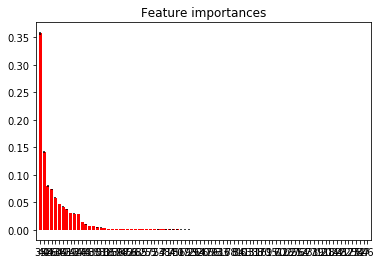

In [95]:
importances = rf_final.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_final.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()